In [103]:
pip install pyspark

In [104]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
import math
import numpy as np
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('k-means').getOrCreate()

sc = spark.sparkContext

In [105]:
def parse_line(line):
    return np.array([float(x) for x in line.split()])

data = sc.textFile("drive/MyDrive/A4/q1/data.txt")
data = data.map(parse_line)

def closest_point(p, centroids):
    p_array = np.array(p)
    distances = np.sqrt(np.sum((centroids - p_array) ** 2, axis=1))
    return np.argmin(distances)

def compute_cost(data, centroids):
    broadcast_centroids = sc.broadcast(centroids)

    def get_distance_squared(point):
        return np.min(np.sum((broadcast_centroids.value - point) ** 2, axis=1))

    return data.map(get_distance_squared).sum()

def kmeans(data, iterations, initial_centroids):
    centroids = initial_centroids
    costs = [compute_cost(data, centroids)]

    for _ in range(iterations):
        closest = data.map(lambda p: (closest_point(p, centroids), (p, 1)))
        point_stats = closest.reduceByKey(lambda pair1, pair2: (pair1[0] + pair2[0], pair1[1] + pair2[1]))
        new_centroids = point_stats.mapValues(lambda sum_count: sum_count[0] / sum_count[1]).collectAsMap()
        centroids = np.array(list(new_centroids.values()))

        costs.append(compute_cost(data, centroids))

    return centroids, costs

def process_initial_centroids(file_path):
    initial_centroids = sc.textFile(file_path)
    initial_centroids = initial_centroids.map(parse_line).collect()
    centroids, costs = kmeans(data, 20, np.array(initial_centroids))

    for i, cost in enumerate(costs):
        print(f"Iteration {i}: Cost = {cost}")

    return costs

costs_c1 = process_initial_centroids("drive/MyDrive/A4/q1/c1.txt")
costs_c2 = process_initial_centroids("drive/MyDrive/A4/q1/c2.txt")

def calculate_percentage_change(costs_initial, costs_final):
    return ((costs_initial - costs_final) / costs_initial) * 100

percentage_change_c1 = calculate_percentage_change(costs_c1[0], costs_c1[10])
percentage_change_c2 = calculate_percentage_change(costs_c2[0], costs_c2[10])
print("percentage change (%) for C1:", percentage_change_c1)
print("percentage change (%) for C2:", percentage_change_c2)


Iteration 0: Cost = 623660345.3064115
Iteration 1: Cost = 509862908.2975454
Iteration 2: Cost = 485480681.8720084
Iteration 3: Cost = 463997011.68501294
Iteration 4: Cost = 460969266.5729968
Iteration 5: Cost = 460537847.9827684
Iteration 6: Cost = 460313099.6535447
Iteration 7: Cost = 460003523.8894081
Iteration 8: Cost = 459570539.3177352
Iteration 9: Cost = 459021103.3422909
Iteration 10: Cost = 458490656.1919812
Iteration 11: Cost = 457944232.5879751
Iteration 12: Cost = 457558005.1986773
Iteration 13: Cost = 457290136.35230196
Iteration 14: Cost = 457050555.05956286
Iteration 15: Cost = 456892235.61535585
Iteration 16: Cost = 456703630.7370345
Iteration 17: Cost = 456404203.01897514
Iteration 18: Cost = 456177800.541994
Iteration 19: Cost = 455986871.0273468
Iteration 20: Cost = 455729268.3551448
Iteration 0: Cost = 438747790.02791756
Iteration 1: Cost = 249803933.62600276
Iteration 2: Cost = 194494814.40631256
Iteration 3: Cost = 169804841.4515432
Iteration 4: Cost = 156295748.80

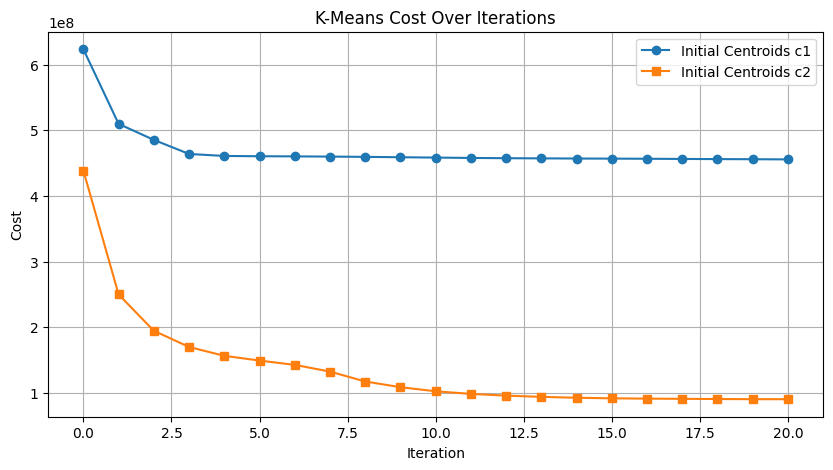

In [106]:
def plot_costs(costs_c1, costs_c2):
    plt.figure(figsize=(10, 5))

    plt.plot(range(len(costs_c1)), costs_c1, label='Initial Centroids c1', marker='o')
    plt.plot(range(len(costs_c2)), costs_c2, label='Initial Centroids c2', marker='s')

    plt.title('K-Means Cost Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_costs(costs_c1, costs_c2)


In [107]:
def parse_line(line):
    return np.array([float(x) for x in line.split()])

data = sc.textFile("drive/MyDrive/A4/q1/data.txt")
data = data.map(parse_line)

def closest_point(p, centroids):
    p_array = np.array(p)
    distances = np.sum(np.abs(centroids - p_array), axis=1)
    return np.argmin(distances)

def compute_cost(data, centroids):
    broadcast_centroids = sc.broadcast(centroids)

    def get_distance_sum(point):
        return np.min(np.sum(np.abs(broadcast_centroids.value - point), axis=1))

    return data.map(get_distance_sum).sum()

def kmeans(data, iterations, initial_centroids):
    centroids = initial_centroids
    costs = [compute_cost(data, centroids)]

    for _ in range(iterations):
        closest = data.map(lambda p: (closest_point(p, centroids), (p, 1)))
        point_stats = closest.reduceByKey(lambda pair1, pair2: (pair1[0] + pair2[0], pair1[1] + pair2[1]))
        new_centroids = point_stats.mapValues(lambda sum_count: sum_count[0] / sum_count[1]).collectAsMap()
        centroids = np.array(list(new_centroids.values()))

        costs.append(compute_cost(data, centroids))

    return centroids, costs

def process_initial_centroids(file_path):
    initial_centroids = sc.textFile(file_path)
    initial_centroids = initial_centroids.map(parse_line).collect()
    centroids, costs = kmeans(data, 20, np.array(initial_centroids))

    for i, cost in enumerate(costs):
        print(f"Iteration {i}: Cost = {cost}")

    return costs

costs_c1 = process_initial_centroids("drive/MyDrive/A4/q1/c1.txt")
costs_c2 = process_initial_centroids("drive/MyDrive/A4/q1/c2.txt")

def calculate_percentage_change(costs_initial, costs_final):
    return ((costs_initial - costs_final) / costs_initial) * 100

percentage_change_c1 = calculate_percentage_change(costs_c1[0], costs_c1[10])
percentage_change_c2 = calculate_percentage_change(costs_c2[0], costs_c2[10])
print("percentage change (%) for C1:", percentage_change_c1)
print("percentage change (%) for C2:", percentage_change_c2)


Iteration 0: Cost = 550117.1419999995
Iteration 1: Cost = 464829.2684039448
Iteration 2: Cost = 470934.15384668094
Iteration 3: Cost = 483874.81628509343
Iteration 4: Cost = 489234.2347883463
Iteration 5: Cost = 487664.6926267904
Iteration 6: Cost = 483718.6659285149
Iteration 7: Cost = 475337.9476330566
Iteration 8: Cost = 474871.96654965664
Iteration 9: Cost = 457244.7897417528
Iteration 10: Cost = 447493.1956040521
Iteration 11: Cost = 450891.8358047706
Iteration 12: Cost = 451232.57747569657
Iteration 13: Cost = 451860.12588546576
Iteration 14: Cost = 451567.2235891488
Iteration 15: Cost = 452710.05209994374
Iteration 16: Cost = 453078.22696184996
Iteration 17: Cost = 450646.1355620941
Iteration 18: Cost = 450419.9701134367
Iteration 19: Cost = 449009.59037188545
Iteration 20: Cost = 446771.2835417304
Iteration 0: Cost = 1433739.3099999954
Iteration 1: Cost = 1084488.7769648773
Iteration 2: Cost = 973431.7146620404
Iteration 3: Cost = 895934.5925630709
Iteration 4: Cost = 865128.33

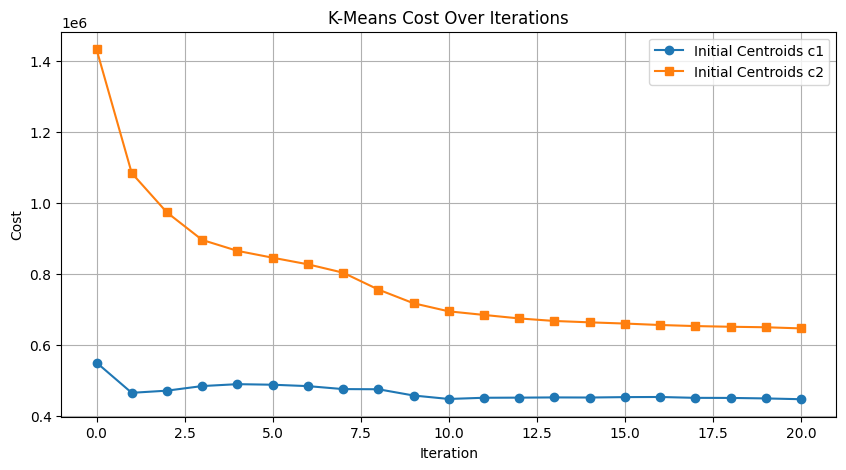

In [108]:
def plot_costs(costs_c1, costs_c2):
    plt.figure(figsize=(10, 5))

    plt.plot(range(len(costs_c1)), costs_c1, label='Initial Centroids c1', marker='o')
    plt.plot(range(len(costs_c2)), costs_c2, label='Initial Centroids c2', marker='s')

    plt.title('K-Means Cost Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_costs(costs_c1, costs_c2)


In [151]:
U = np.loadtxt("drive/MyDrive/A4/q2/user-shows.txt")
with open("drive/MyDrive/A4/q2/shows.txt", "r") as file:
    S = file.read().splitlines()

P = np.linalg.inv(np.sqrt(np.array([[sum(U[i]) if j == i else 0 for j in range(len(U))] for i in range(len(U))])))
Q = np.linalg.inv(np.sqrt(np.diag(np.sum(U, axis = 0))))

print("User to User Collaborative Filtering:")
for i in reversed(np.argsort((P @ U @ np.transpose(U) @ P @ U)[499, :100])[-5:]): print(S[i].strip('"\''))
print("Item to Item Collaborative Filtering:")
for i in reversed(np.argsort((U @ Q @ np.transpose(U) @ U @ Q)[499, :100])[-5:]): print(S[i].strip('"\''))

User to User Collaborative Filtering:
FOX 28 News at 10pm
Family Guy
2009 NCAA Basketball Tournament
NBC 4 at Eleven
Two and a Half Men
Item to Item Collaborative Filtering:
FOX 28 News at 10pm
Family Guy
NBC 4 at Eleven
2009 NCAA Basketball Tournament
Access Hollywood
